In [20]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU, ReLU
from tensorflow.keras.layers import Dropout
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
import matplotlib.pyplot as plt
from matplotlib import pyplot
import numpy as np

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets .cifar10.load_data()
# first we will normalise the data
train_images, test_images = train_images / 255.0 , test_images / 255

In [3]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

Text(0.5, 1.0, 'frog')

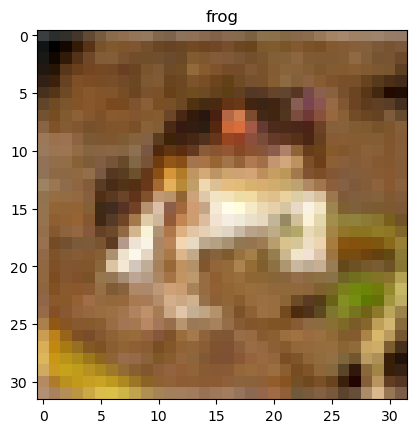

In [4]:
plt.imshow(train_images[0])
plt.title(classes[train_labels[0][0]])

In [5]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

# model = Sequential()
# model.add(layers.Conv2D(32,(3,3),activation = 'relu', input_shape=(32,32,3)))
# model.add(layers.MaxPooling2D((2,2)))
# tf.keras.layers.Dropout(0.25)

# model.add(layers.Conv2D(64,(3,3),activation = 'relu'))
# model.add(layers.MaxPooling2D((2,2)))
# tf.keras.layers.Dropout(0.25)

# model.add(layers.Conv2D(64,(3,3),activation = 'relu')) 

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                        

In [7]:
# model.add(layers.Flatten())
# model.add(layers.Dense(64,activation = 'relu'))
# model.add(layers.Dense(10,activation = 'softmax'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                        

In [9]:
import tensorflow as tf
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [10]:
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics=['accuracy'])

history =model.fit(train_images, train_labels, epochs=25, batch_size=64,
                   validation_data=(test_images, test_labels), callbacks = early_stopping)

Epoch 1/25
782/782 [==============================] - 129s 163ms/step - loss: 1.6447 - accuracy: 0.3979 - val_loss: 1.2258 - val_accuracy: 0.5545
Epoch 2/25
782/782 [==============================] - 128s 163ms/step - loss: 1.1804 - accuracy: 0.5799 - val_loss: 1.0114 - val_accuracy: 0.6377
Epoch 3/25
782/782 [==============================] - 126s 161ms/step - loss: 0.9689 - accuracy: 0.6591 - val_loss: 0.8738 - val_accuracy: 0.6914
Epoch 4/25
782/782 [==============================] - 124s 158ms/step - loss: 0.8451 - accuracy: 0.7056 - val_loss: 0.8152 - val_accuracy: 0.7154
Epoch 5/25
782/782 [==============================] - 125s 160ms/step - loss: 0.7580 - accuracy: 0.7340 - val_loss: 0.7487 - val_accuracy: 0.7421
Epoch 6/25
782/782 [==============================] - 124s 159ms/step - loss: 0.6940 - accuracy: 0.7573 - val_loss: 0.6791 - val_accuracy: 0.7655
Epoch 7/25
782/782 [==============================] - 126s 161ms/step - loss: 0.6511 - accuracy: 0.7737 - val_loss: 0.6485 -

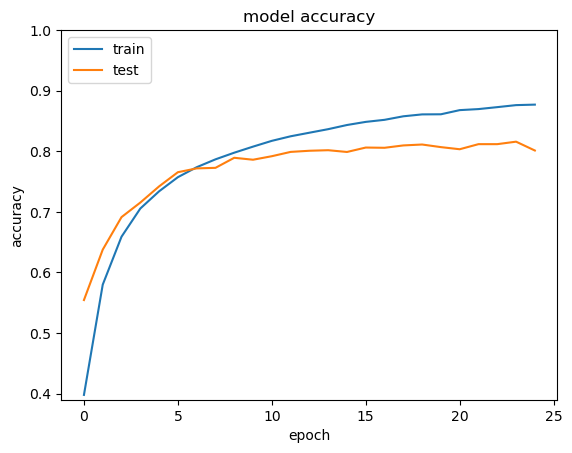

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.ylim(0.39,1)
plt.legend(['train','test'], loc = 'upper left')
plt.show()

In [12]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

313/313 - 8s - loss: 0.6461 - accuracy: 0.8013 - 8s/epoch - 27ms/step


In [13]:
print(test_acc)

0.8012999892234802


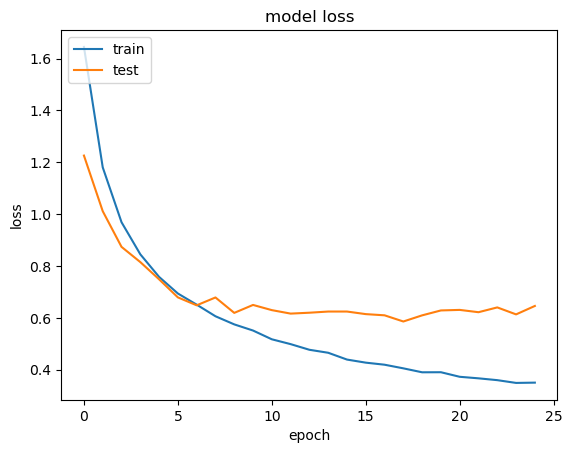

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
#plt.ylim(0.80, 0.88)
plt.legend(['train','test'], loc = 'upper left')
plt.show()

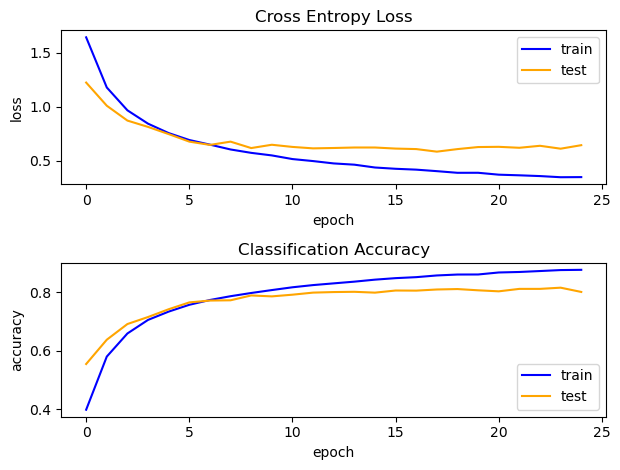

In [26]:
pyplot.subplot(211)
pyplot.title('Cross Entropy Loss')
pyplot.plot(history.history['loss'], color='blue', label='train')
pyplot.plot(history.history['val_loss'], color='orange', label='test')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'])
# plot accuracy
pyplot.subplot(212)
pyplot.title('Classification Accuracy')
pyplot.plot(history.history['accuracy'], color='blue', label='train')
pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'lower right')
plt.tight_layout()